In [650]:
import pandas as pd
import numpy as np

In [651]:
# STEP 1: DATA LOADING

In [652]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [653]:
#The diabetes data set consists of 768 data points, with 9 features each: 

In [654]:
#“Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1:

In [655]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [656]:
#STEP 2: Data Preprocessing(includes Imputing missing values and Data Encoding)
#(Imputed missing values using SimpleImputer)

In [657]:
# NO need for Data cleaning.Because data is already cleaned.

In [658]:
#Step 3: Splitting the dataset into training and test set

In [659]:
x = df.iloc[:, 0:-1].values 
y = df.iloc[:, -1].values  

In [660]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) 
# random_state ensures that the data split is the same every time you run the code. Hence, the same results are produced every time.

In [661]:
# Feature scaling may be required 
# Feature scaling is used to bring all features(variables) of a dataset into the same range, ensuring that no single feature dominates others due 
# to differences in magnitude. It is particularly important in algorithms that rely on distance metrics or are sensitive to feature magnitudes. 
# Feature Scaling is not required for Tree based classification Algorithms.

# Feature scaling is always done after data splitting to avoid Data leakage.
# Fitting the scaler on the entire dataset (training + testing) before splitting will leak information from the test data into the training process.
#This gives an artificially high performance score and misrepresents the model’s ability to generalize.

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
standard_scaler = StandardScaler()
x_train=standard_scaler.fit_transform(x_train)
x_test=standard_scaler.transform(x_test)

In [662]:
#Step 4: Build Model / Model Training   (using Decision Tree Classifier)

In [663]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)# random state ensures reproducibility.i.e Same results are produced every time.
DTC.fit(x_train, y_train)                                                  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [664]:
#Step 5: Evaluate Model / Model Testing

In [665]:
from sklearn.metrics import  confusion_matrix, classification_report,accuracy_score,precision_score,recall_score

In [666]:
y_pred= DTC.predict(x_test)

In [667]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[123  34]
 [ 30  44]]


In [668]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.56      0.59      0.58        74

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.73      0.72      0.72       231



In [669]:
DTC_recall=recall_score(y_test,y_pred,average='macro')

In [670]:
DTC_precision=precision_score(y_test,y_pred,average='macro')

In [671]:
DTC_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision Tree Classifier on test dataset:",round(DTC_accuracy,2))

Accuracy of Decision Tree Classifier on test dataset: 0.72


In [672]:
#Step 4: Build Model / Model Training   (using Neural Network Classifier)

In [673]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier( max_iter=200,random_state=0) 
mlp.fit(x_train, y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [674]:
#Step 5: Evaluate Model / Model Testing

In [675]:
y_pred= DTC.predict(x_test)

In [676]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[123  34]
 [ 30  44]]


In [677]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.56      0.59      0.58        74

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.73      0.72      0.72       231



In [678]:
mlp_recall=recall_score(y_test,y_pred,average='macro')
mlp_precision=precision_score(y_test,y_pred,average='macro')
mlp_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Neural Network on test dataset:",round(mlp_accuracy,2))

Accuracy of Neural Network on test dataset: 0.72


In [679]:
# Step 4: Build Model / Model Training   (using Logistic Regression Classifier)

In [680]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [681]:
#Step 5: Evaluate Model / Model Testing

In [682]:
y_pred= logreg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[141  16]
 [ 35  39]]


In [683]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [684]:
logreg_recall=recall_score(y_test,y_pred,average='macro')
logreg_precision=precision_score(y_test,y_pred,average='macro')
logreg_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression Classifier on test dataset:",round(logreg_accuracy,2))

Accuracy of Logistic Regression Classifier on test dataset: 0.78


In [685]:
# Step 4: Build Model / Model Training   (using Support Vector Machine Classifier)

In [686]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0) #The kernel function allows SVM to handle non-linear relationships between features and target labels by transforming the data into a space where it becomes linearly separable
svm_classifier.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [687]:
#Step 5: Evaluate Model / Model Testing

In [688]:
y_pred= svm_classifier.predict(x_test)

In [689]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[141  16]
 [ 34  40]]


In [690]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



In [691]:
svm_recall=recall_score(y_test,y_pred,average='macro')
svm_precision=precision_score(y_test,y_pred,average='macro')
svm_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of SVC Classifier on test dataset:",round(svm_accuracy,2))

Accuracy of SVC Classifier on test dataset: 0.78


In [692]:
# Step 4: Build Model / Model Training   (using Naive Bayes Classifier)

In [693]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [694]:
#Step 5: Evaluate Model / Model Testing

In [695]:
y_pred= nb_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[138  19]
 [ 36  38]]


In [696]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [697]:
nb_recall=recall_score(y_test,y_pred,average='macro')
nb_precision=precision_score(y_test,y_pred,average='macro')
nb_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Naive Bayes Classifier on test dataset:",round(nb_accuracy,2))

Accuracy of Naive Bayes Classifier on test dataset: 0.76


In [698]:
# Step 4: Build Model / Model Training   (using Random forest Classifier)

In [699]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [700]:
#Step 5: Evaluate Model / Model Testing

In [701]:
y_pred= rf_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[140  17]
 [ 34  40]]


In [702]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



In [703]:
rf_recall=recall_score(y_test,y_pred,average='macro')
rf_precision=precision_score(y_test,y_pred,average='macro')
rf_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Random forest Classifier on test dataset:",round(rf_accuracy,2))

Accuracy of Random forest Classifier on test dataset: 0.78


In [704]:
# Step 4: Build Model / Model Training   ( K Nearest Neighbor classifier)

In [705]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 11):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(x_train, y_train)
 y_pred = knn.predict(x_test)
 cm = confusion_matrix(y_test,y_pred)
 print(cm)
 accuracy=accuracy_score(y_test,y_pred)
 print(f"Accuracy of KNN Classifier with k={k}: {round(accuracy,2)}")

[[130  27]
 [ 39  35]]
Accuracy of KNN Classifier with k=1: 0.71
[[145  12]
 [ 53  21]]
Accuracy of KNN Classifier with k=2: 0.72
[[131  26]
 [ 37  37]]
Accuracy of KNN Classifier with k=3: 0.73
[[146  11]
 [ 44  30]]
Accuracy of KNN Classifier with k=4: 0.76
[[134  23]
 [ 30  44]]
Accuracy of KNN Classifier with k=5: 0.77
[[142  15]
 [ 41  33]]
Accuracy of KNN Classifier with k=6: 0.76
[[134  23]
 [ 36  38]]
Accuracy of KNN Classifier with k=7: 0.74
[[142  15]
 [ 39  35]]
Accuracy of KNN Classifier with k=8: 0.77
[[138  19]
 [ 34  40]]
Accuracy of KNN Classifier with k=9: 0.77
[[142  15]
 [ 41  33]]
Accuracy of KNN Classifier with k=10: 0.76


In [706]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_recall=recall_score(y_test,y_pred,average='macro')
knn_precision=precision_score(y_test,y_pred,average='macro')
knn_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of KNN Classifier on test dataset:",round(knn_accuracy,2))

Accuracy of KNN Classifier on test dataset: 0.73


In [707]:
import matplotlib.pyplot as plt
import numpy as np

In [708]:
models = ['DTC', 'Neural', 'Log Reg', 'SVM', 'NB','RF','KNN']
metrics = ['Accuracy', 'Recall', 'Precision']

In [709]:
values = [
    [DTC_accuracy,DTC_recall,DTC_precision],  
    [mlp_accuracy,mlp_recall,mlp_precision],  
    [logreg_accuracy,logreg_recall,logreg_precision], 
    [svm_accuracy,svm_recall,svm_precision],  
    [nb_accuracy,nb_recall,nb_precision], 
    [rf_accuracy,rf_recall,rf_precision],  
    [knn_accuracy,knn_recall,knn_precision],  
]
values = np.array(values)


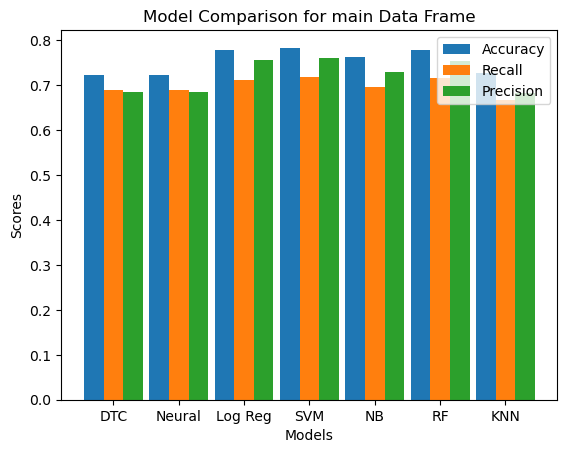

In [710]:
bar_width = 0.3
x = np.arange(len(models))
for i in range(len(metrics)):
    plt.bar(x + i * bar_width, values[:, i], width=bar_width, label=metrics[i])

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison for main Data Frame')
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, models) 
plt.legend()
plt.show()
    